In [5]:
# primes
import math as m
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import imageio
import time
from scipy import signal

%matplotlib notebook
images = []

In [9]:

n = 10000

n = m.ceil(m.sqrt(n)) # find nearest perfect square root
if n % 2 ==0: # coerce to an odd number (so that the matrix has a center)
    n = n + 1
n = n**2 # convert n to the nearest perfect square
Primes = []
for i in range(2,n):
    tracker = []
    for j in range(2, m.ceil(m.sqrt(i))):
        if i % j ==0:
            tracker.append(1)
            break
    if len(tracker) == 0:
         Primes.append(i)
print(Primes[:20])

[2, 3, 4, 5, 7, 9, 11, 13, 17, 19, 23, 25, 29, 31, 37, 41, 43, 47, 49, 53]


In [10]:
''' '''
dimension=int(m.sqrt(n))

Spiral = np.zeros((dimension,dimension))

Spiral[m.floor(dimension/2),m.floor(dimension/2)] = 1
Current=np.array([m.floor(dimension/2),m.floor(dimension/2)])

'''' Define movements '''

Right = np.array([0,1])
Left = np.array([0,-1])
Up = np.array([-1,0])
Down = np.array([1,0])

count=2
seq=1


''' construct the outward spiral '''
while seq == seq: # proceed until break
    for i in range(1,count):
        Spiral[tuple(Current+Right)] = seq+1
        Current=Current+Right
        seq += 1
        if seq >= n: # for odd perfect square roots, the square can only complete after this step.
            break

    if seq >= n: # for odd perfect square roots, the square can only complete after this step.
        break

    for i in range(1,count):
        Spiral[tuple(Current+Up)] = seq+1
        Current=Current+Up
        seq += 1

    count += 1

    for i in range(1,count):
        Spiral[tuple(Current+Left)] = seq+1
        Current=Current+Left
        seq += 1

    for i in range(1,count):
        Spiral[tuple(Current+Down)] = seq+1
        Current=Current+Down
        seq += 1
    
    count += 1

SpiralCP=Spiral # create copy of the spiral for easy experimentation

<IPython.core.display.Javascript object>


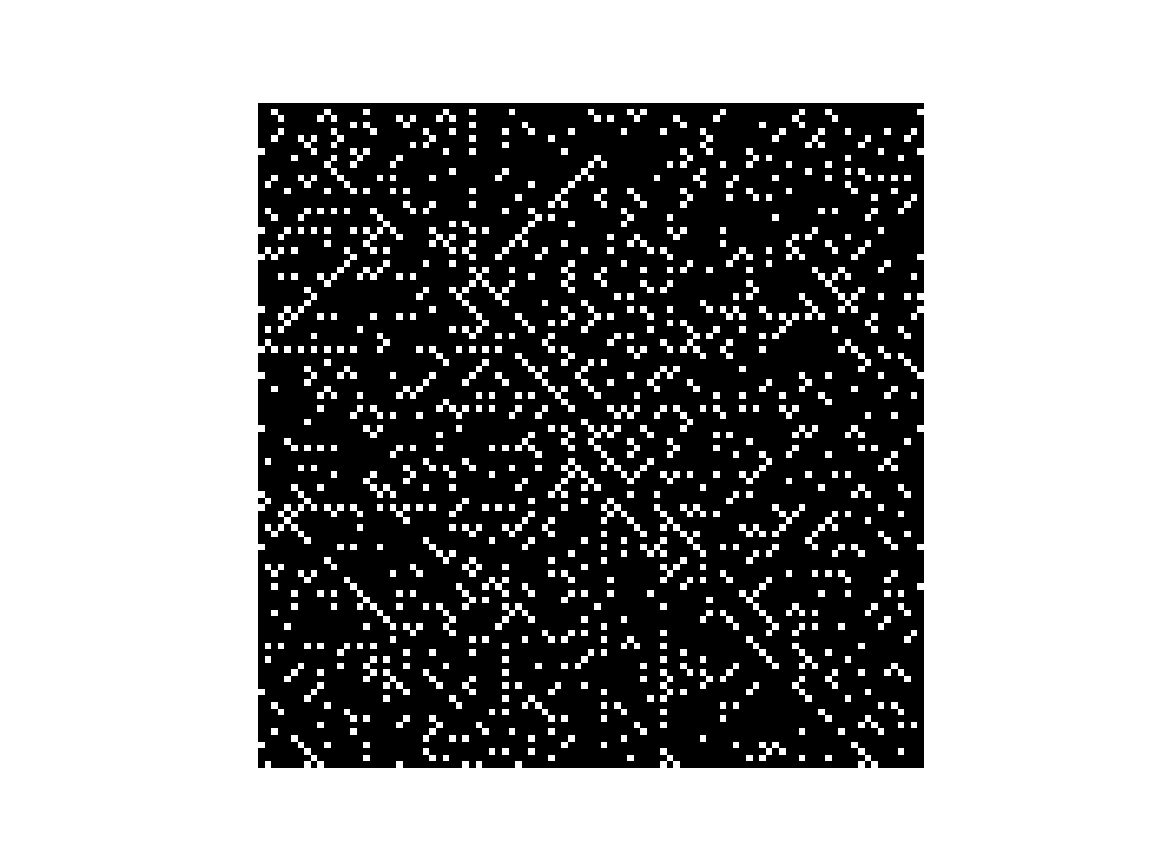

In [8]:
Spiral = SpiralCP
for i in range(0, int(m.sqrt(n))):
    for j in range(0, int(m.sqrt(n))):
        if int(Spiral[i,j]) in Primes:
            Spiral[i,j] = 1
        else:
            Spiral[i,j] = 0
plt.imshow(Spiral, cmap='bone', origin='lower')

In [11]:
images=[]

    
for i in range(100):

    Spiral=SpiralCP+i
    for i in range(0, int(m.sqrt(n))):
        for j in range(0, int(m.sqrt(n))):
            if int(Spiral[i,j]) in Primes:
                Spiral[i,j] = 1
            else:
                Spiral[i,j] = 0
    plt.clf()
    plt.imshow(Spiral, cmap='bone', origin='lower')
    plt.axis('off')
    now = time.time()
    filename = 'Spiral/spiral_'+str(i)+'.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    #plt.show()
    
imageio.mimsave('Spiral_movie.gif', images)